In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [4]:
# Create optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =False, checkpoint= True)

In [5]:
df = op.read.csv("Meteorite_Landings.csv", header=True)

In [6]:
df.table(10)

name 1 (string),id 2 (string),nametype 3 (string),recclass 4 (string),mass (g) 5 (string),fall 6 (string),year 7 (string),reclat 8 (string),reclong 9 (string),GeoLocation 10 (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


In [7]:
import timeit
from optimus.helpers.functions import print_json as pj

In [8]:
df.table()

name 1 (string),id 2 (string),nametype 3 (string),recclass 4 (string),mass (g) 5 (string),fall 6 (string),year 7 (string),reclat 8 (string),reclong 9 (string),GeoLocation 10 (string)
Aachen,1,Valid,L5,21,Fell,01/01/1880⸱12:00:00⸱AM,50.775000,6.083330,"(50.775000,⸱6.083330)"
Aarhus,2,Valid,H6,720,Fell,01/01/1951⸱12:00:00⸱AM,56.183330,10.233330,"(56.183330,⸱10.233330)"
Abee,6,Valid,EH4,107000,Fell,01/01/1952⸱12:00:00⸱AM,54.216670,-113.000000,"(54.216670,⸱-113.000000)"
Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976⸱12:00:00⸱AM,16.883330,-99.900000,"(16.883330,⸱-99.900000)"
Achiras,370,Valid,L6,780,Fell,01/01/1902⸱12:00:00⸱AM,-33.166670,-64.950000,"(-33.166670,⸱-64.950000)"
Adhi⸱Kot,379,Valid,EH4,4239,Fell,01/01/1919⸱12:00:00⸱AM,32.100000,71.800000,"(32.100000,⸱71.800000)"
Adzhi-Bogdo⸱(stone),390,Valid,LL3-6,910,Fell,01/01/1949⸱12:00:00⸱AM,44.833330,95.166670,"(44.833330,⸱95.166670)"
Agen,392,Valid,H5,30000,Fell,01/01/1814⸱12:00:00⸱AM,44.216670,0.616670,"(44.216670,⸱0.616670)"
Aguada,398,Valid,L6,1620,Fell,01/01/1930⸱12:00:00⸱AM,-31.600000,-65.233330,"(-31.600000,⸱-65.233330)"
Aguila⸱Blanca,417,Valid,L,1440,Fell,01/01/1920⸱12:00:00⸱AM,-30.866670,-64.550000,"(-30.866670,⸱-64.550000)"


Number of columns,10
Number of rows,45716
Total Missing (%),0.4891941552191793%
Total size in memory,88.4MiB
Categorical,5
Numeric,4
Date,1
Bool,
Not available,0
Distinct count,45515
Unique (%),99.56

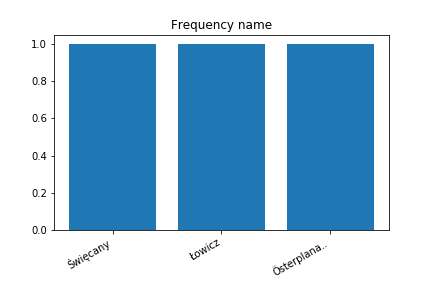
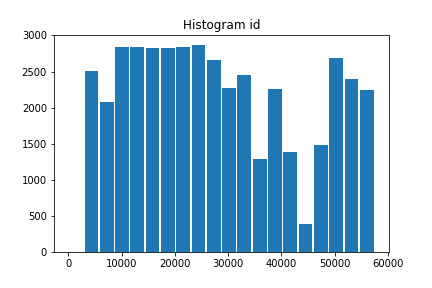
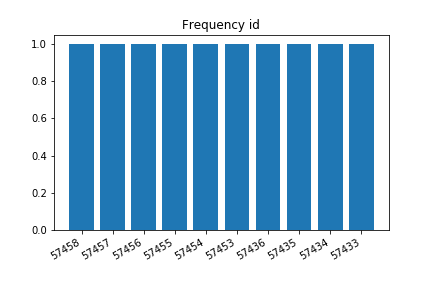
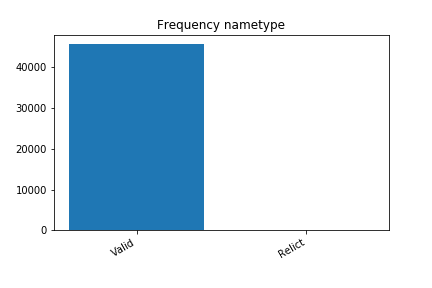
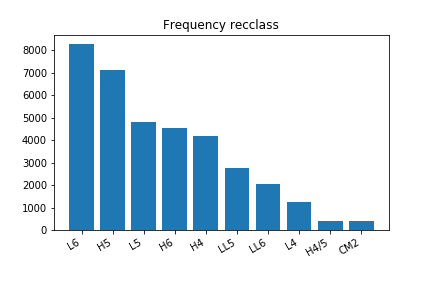
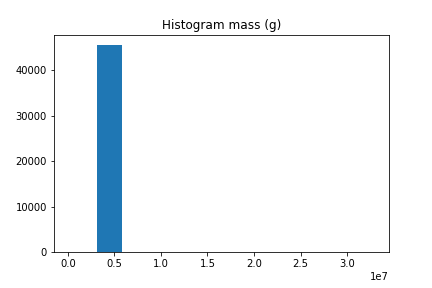
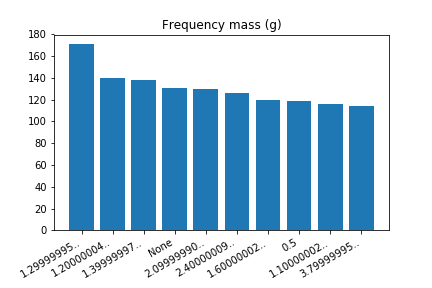
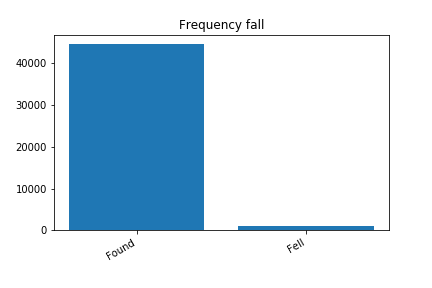
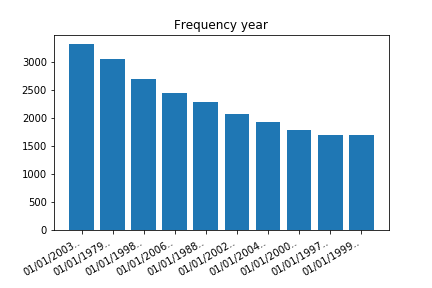
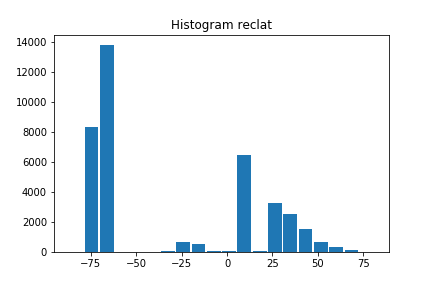
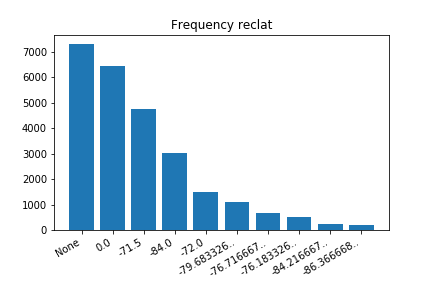
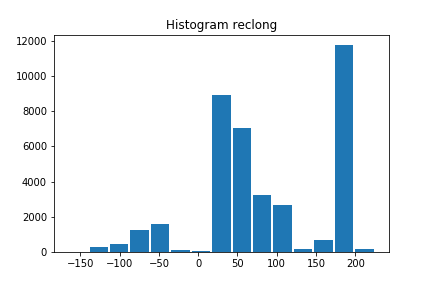
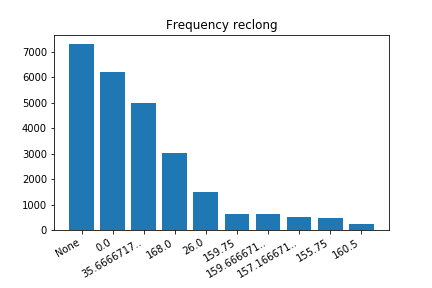
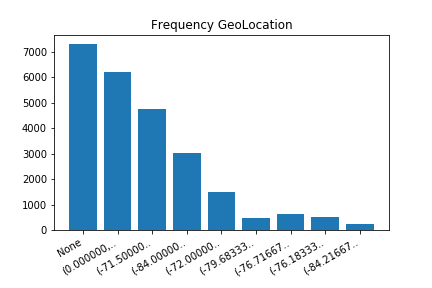

78.5036562499289

In [13]:
start_time = timeit.default_timer()
#op.profiler.run(df, ["id","mass (g)", "reclat"])
op.profiler.run(df, "*")
timeit.default_timer() - start_time

### Plot profile for a specific column

In [ ]:
start_time = timeit.default_timer()
Profiler.columns(df, "reclat")
timeit.default_timer() - start_time

### Output a json file

### Plot histagram for multiple columns

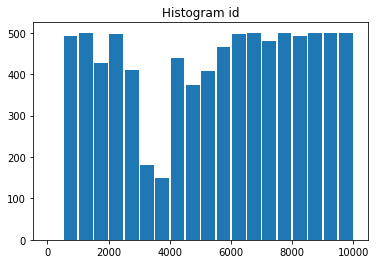

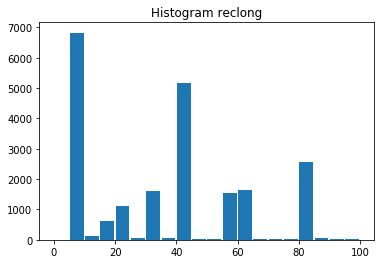

In [12]:
df.plots.hist(["id", "reclong"], 20)

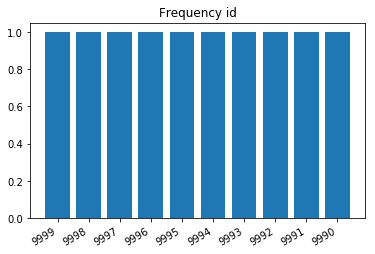

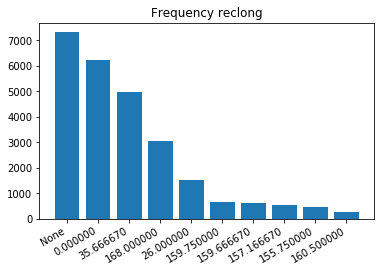

In [13]:
df.plots.frequency(["id", "reclong"], 10)

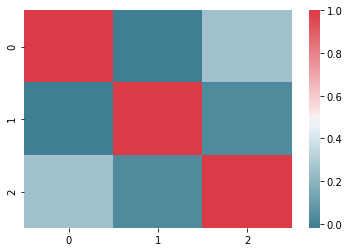

In [14]:
df.plots.correlation(["id","mass (g)", "reclat"])

In [19]:
df.correlation(["id","mass (g)", "reclat"], output="array")

array([[ 1.        , -0.01888518,  0.25706522],
       [-0.01888518,  1.        ,  0.02892697],
       [ 0.25706522,  0.02892697,  1.        ]])